In [76]:
import pyaudio
import struct
import numpy
import matplotlib.pyplot as plt

CHUNK = 1024 * 2 #Samples per frame
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100

In [77]:
p = pyaudio.PyAudio()
stream = p.open(
    format = FORMAT,
    channels = CHANNELS,
    rate=RATE,
    input=True,
    output=True,
    frames_per_buffer=CHUNK
)

data = struct.unpack(str(2 * CHUNK) + 'B', stream.read(CHUNK))

In [79]:
from scipy import fftpack
transformed = fftpack.fft(data)

array([516722.           -0.j        ,  -8677.16510046-2725.2788258j ,
         3884.02167054-2392.32400108j, ...,
        -2947.5869384  +300.1649249j ,   3884.02167054+2392.32400108j,
        -8677.16510046+2725.2788258j ])

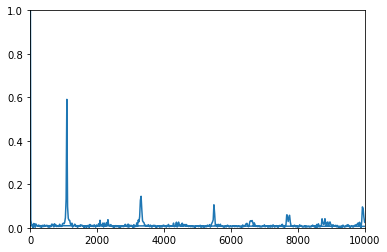

In [81]:
import matplotlib.pyplot as plt

y = abs(transformed[0:CHUNK]) * 2 / (256 * CHUNK)
x = fftpack.fftfreq(CHUNK, 1/RATE)
plt.plot(x, y)
plt.xlim(0, 10000)
plt.ylim(0,1)
plt.show()